## Customer Churn Overview
**Customer Churn**: The phenomenon where customers discontinue their subscriptions or business relationships with a company.
<br>
**Churn Indicator**: If the 'Churn' column value is 'Yes', the customer has stopped using the company’s services.
<br>
<br>
**Implications**:
<br>
- Churn Rate: The rate at which customers leave a company, inversely related to customer retention.
<br>
- Impact on Business: High churn rates indicate customer dissatisfaction and potential revenue loss.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
db = pd.read_csv(r"D:\STUDY\CustomerChurn.csv")

In [3]:
print(db)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## Study Data

In [4]:
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(db.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
print(db.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Null Values

In [7]:
print(db.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print(db.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
db['TotalCharges'] = pd.to_numeric(db['TotalCharges'], errors='coerce')
print(db[db['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

## Outliers

### Outliers in data

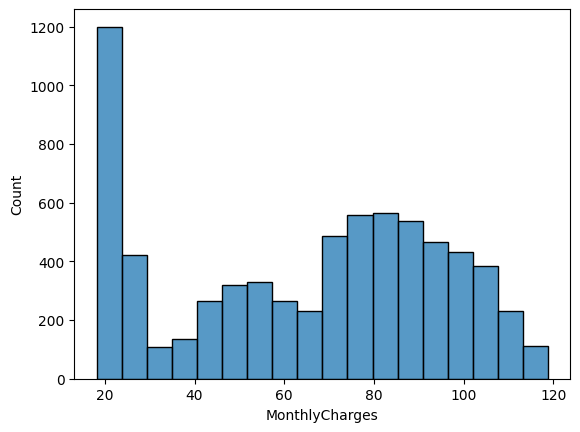

In [10]:
sns.histplot(db['MonthlyCharges'])
plt.show()

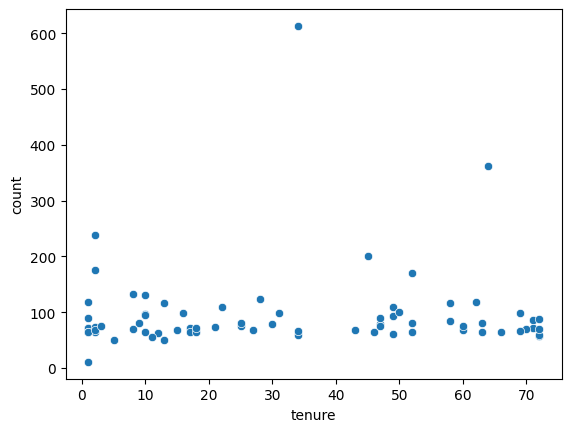

In [11]:
sns.scatterplot(x=db['tenure'], y=db['tenure'].value_counts())
plt.show()

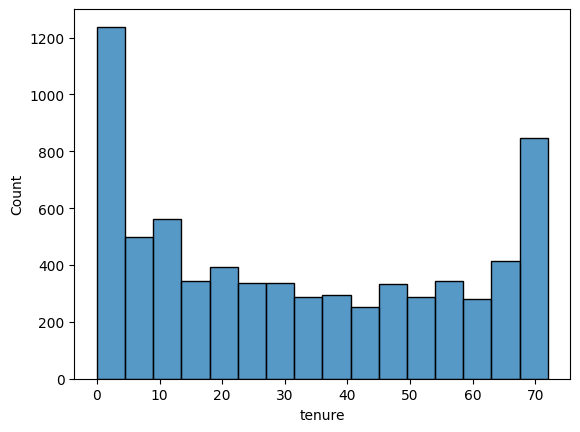

In [12]:
sns.histplot(db['tenure'])
plt.show()

## Analysis
### Univar Analysis

- Gender Distribution Among Customers

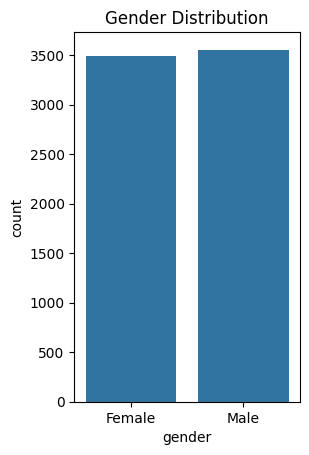

In [13]:
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=db)
plt.title('Gender Distribution')
plt.show()

- Monthly Charge Distribution Among Customers

Text(0, 0.5, 'Frequency')

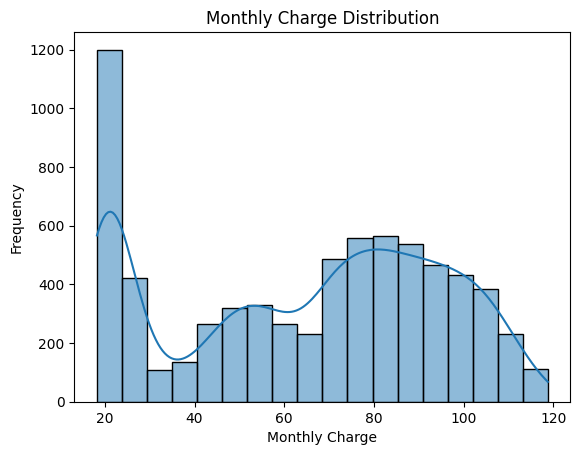

In [14]:
sns.histplot(db['MonthlyCharges'], kde=True)
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')

- Churn Count among Customers

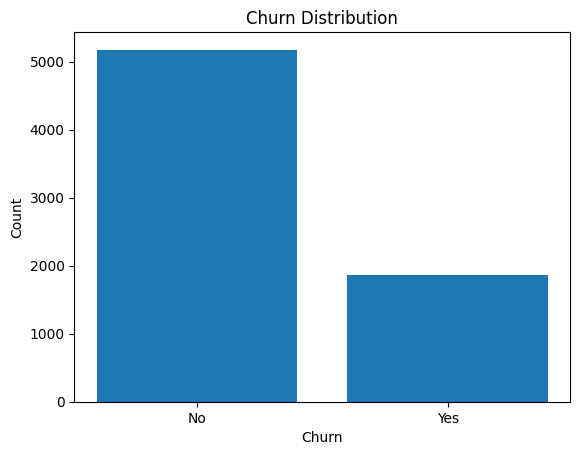

In [15]:
churn_counts = db['Churn'].value_counts()

plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks(['No', 'Yes'])

plt.show()

- Churn Distribution Among Customers

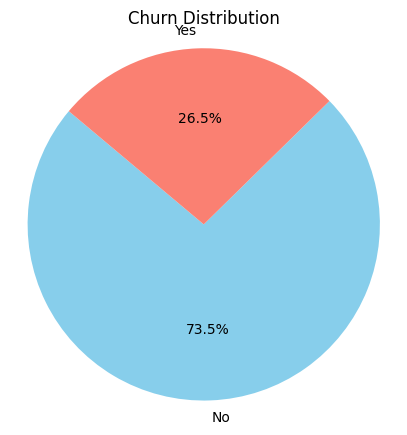

In [16]:
churn_counts = db['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

### Bivar Analysis

- MonthlyCharges and Churn to see how monthly charges vary between customers who churned and those who did not

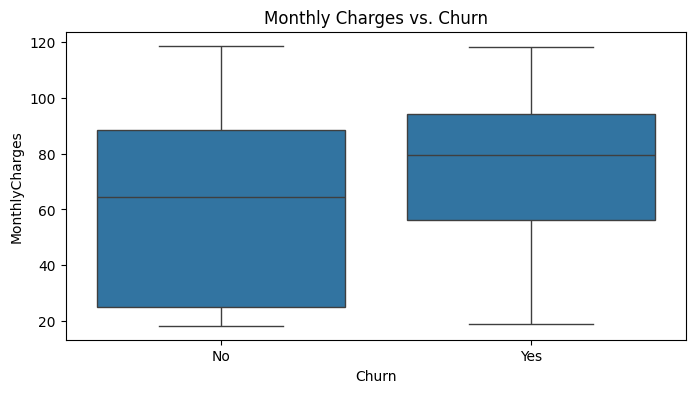

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=db)
plt.title('Monthly Charges vs. Churn')
plt.show()

- Gender and Churn to see the distribution of churn across different genders

<Figure size 1000x500 with 0 Axes>

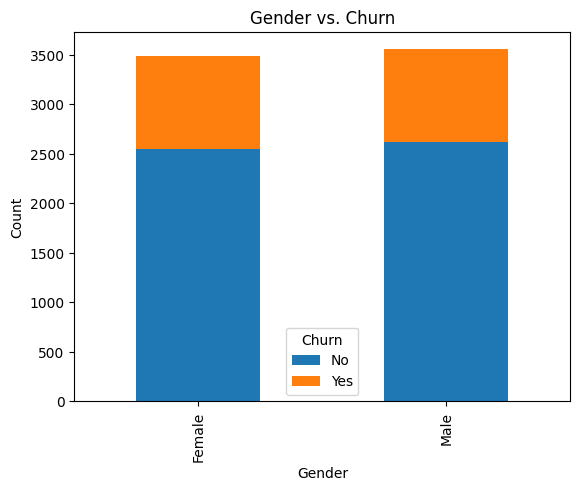

In [18]:
plt.figure(figsize=(10, 5))
gender_churn = pd.crosstab(db['gender'], db['Churn'])
gender_churn.plot(kind='bar', stacked=True)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- Stacked bar plot to show the relationship between Partner and Churn.

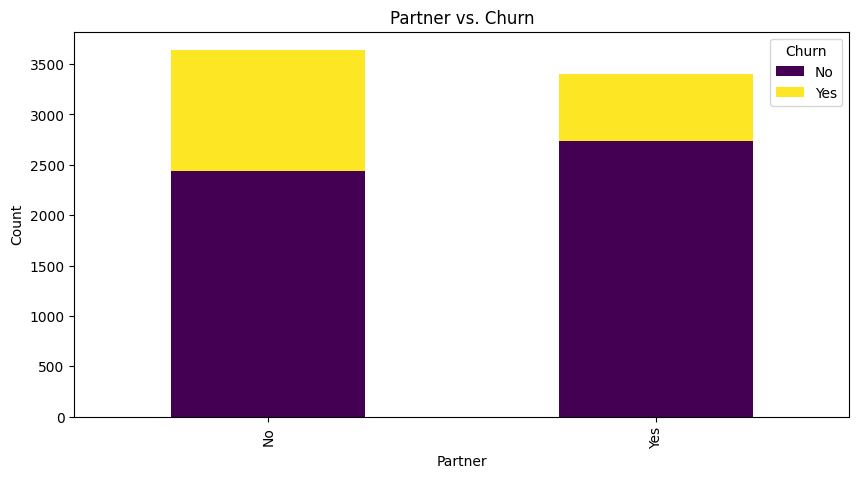

In [19]:
plt.figure(figsize=(10, 5))
partner_churn = pd.crosstab(db['Partner'], db['Churn'])
partner_churn.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Partner vs. Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()


### Multivar Analysis

- Show the relationship between Churn, Contract, and PaymentMethod.

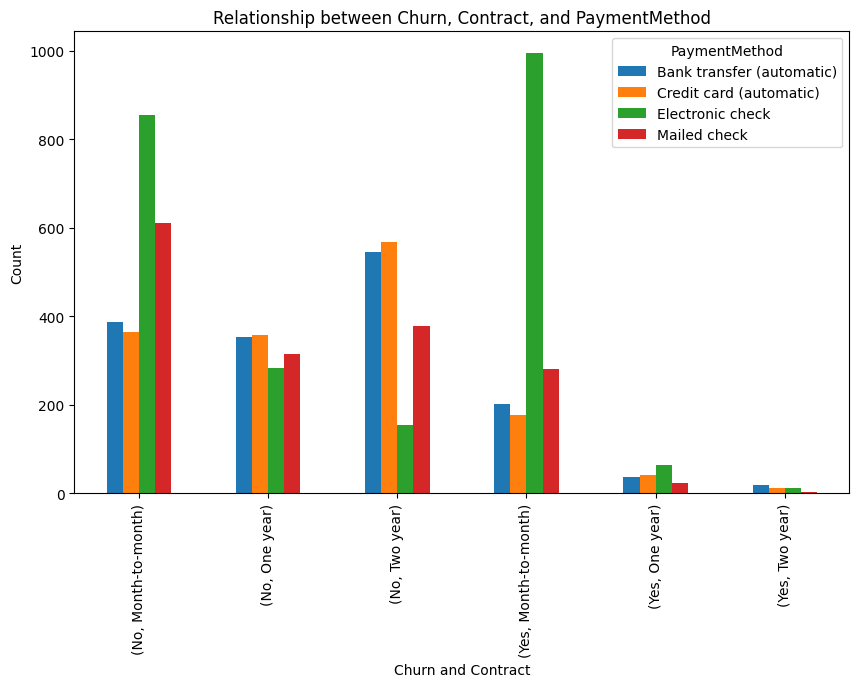

In [21]:
grouped_data = db.groupby(["Churn", "Contract", "PaymentMethod"]).size().reset_index(name="Count")

pivoted_data = grouped_data.pivot(index=["Churn", "Contract"], columns="PaymentMethod", values="Count")

fig, ax = plt.subplots(figsize=(10, 6))
pivoted_data.plot(kind="bar", ax=ax)

ax.set_title("Relationship between Churn, Contract, and PaymentMethod")
ax.set_xlabel("Churn and Contract")
ax.set_ylabel("Count")

plt.show()

- A Heatmap to show correlations between numerical features.

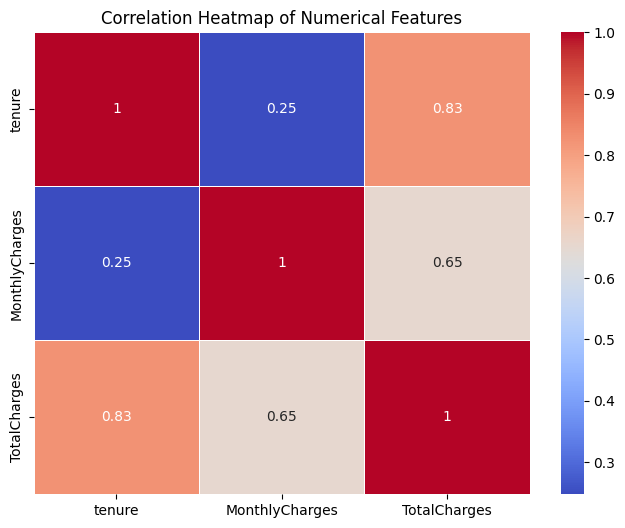

In [24]:
corr_matrix = db[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Box plots of MonthlyCharges grouped by Contract and Churn.

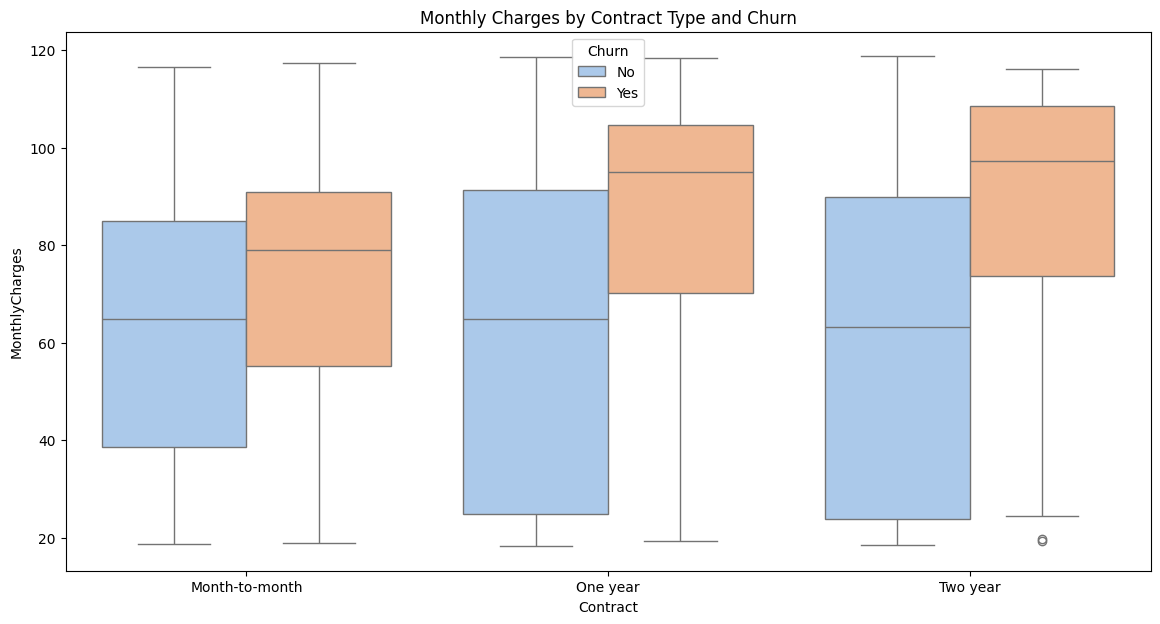

In [29]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=db, palette='pastel')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()


- Pair Plot to visualize relationships between numerical features (tenure, MonthlyCharges, TotalCharges) and Churn.

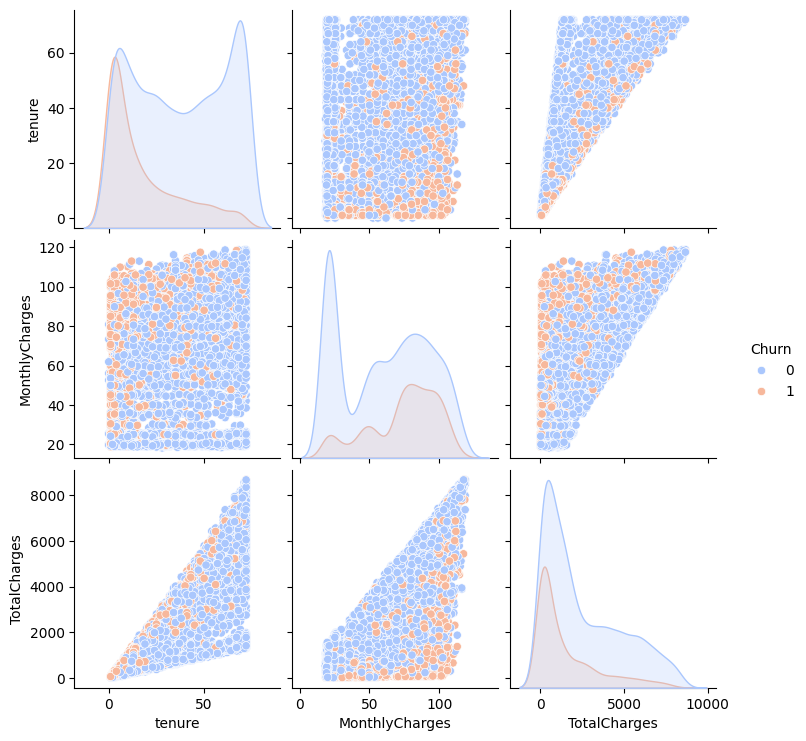

In [30]:
db['Churn'] = db['Churn'].map({'No': 0, 'Yes': 1})

sns.pairplot(db[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')
plt.show()